In [2]:
import json
from matplotlib import pyplot as plt

In [3]:
with open('grid_search_results.json', 'r') as file:
    data = json.load(file)

In [4]:
data['topk']['same_W']

{'pre_encoder_bias': {'active_neurons_per_token': [2, 5, 10, 30, 70, 100],
  'active_neurons_per_batch': [33.1, 94.9, 232.1, 763.0, 1295.0, 1346.0],
  'loss': [0.02385063488036394,
   0.017678637616336347,
   0.012156594451516867,
   0.005852416343986988,
   0.003129171603359282,
   0.0024882336147129536]},
 'not_pre_encoder_bias': {'active_neurons_per_token': [2, 5, 10, 30, 70, 100],
  'active_neurons_per_batch': [36.0, 107.5, 191.8, 809.7, 1415.6, 1500.0],
  'loss': [0.023585841991007328,
   0.017401793226599693,
   0.012429429776966571,
   0.005668807495385409,
   0.00293056252412498,
   0.002343870629556477]}}

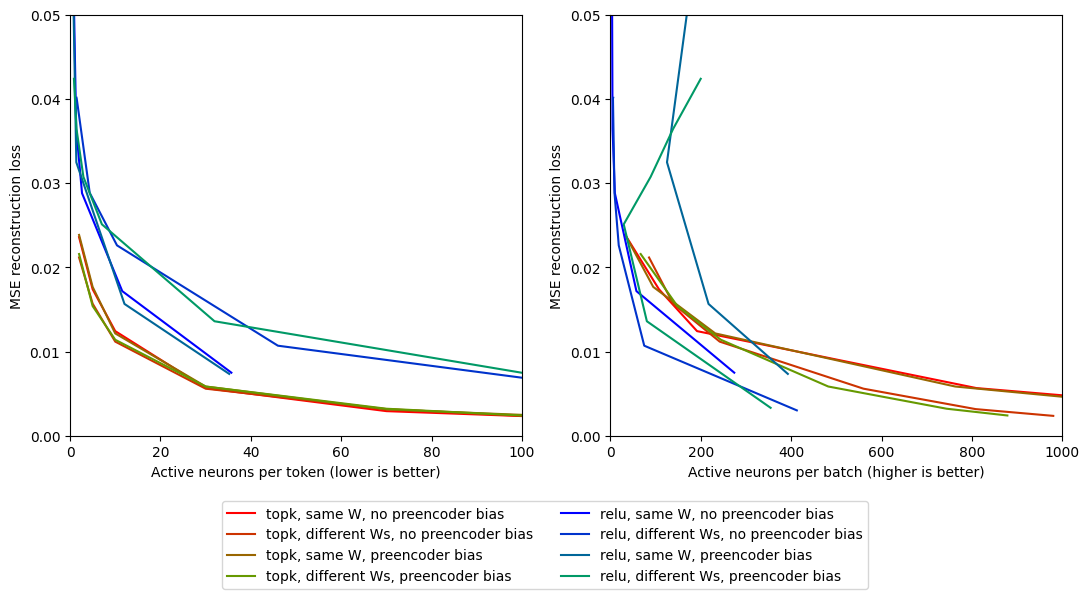

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharey=False)
axs = axs.flatten()

#topk
axs[0].plot(
    data['topk']['same_W']['not_pre_encoder_bias']['active_neurons_per_token'],
    data['topk']['same_W']['not_pre_encoder_bias']['loss'],
    label="topk, same W, no preencoder bias",
    color=(1, 0, 0)
)

axs[0].plot(
    data['topk']['not_same_W']['not_pre_encoder_bias']['active_neurons_per_token'],
    data['topk']['not_same_W']['not_pre_encoder_bias']['loss'],
    label="topk, different Ws, no preencoder bias",
    color=(0.8, 0.2, 0)
)

axs[0].plot(
    data['topk']['same_W']['pre_encoder_bias']['active_neurons_per_token'],
    data['topk']['same_W']['pre_encoder_bias']['loss'],
    label="topk, same W, preencoder bias",
    color=(0.6, 0.4, 0)
)

axs[0].plot(
    data['topk']['not_same_W']['pre_encoder_bias']['active_neurons_per_token'],
    data['topk']['not_same_W']['pre_encoder_bias']['loss'],
    label="topk, different Ws, preencoder bias",
    color=(0.4, 0.6, 0)
)



# relu
axs[0].plot(
    data['relu']['same_W']['not_pre_encoder_bias']['active_neurons_per_token'],
    data['relu']['same_W']['not_pre_encoder_bias']['loss'],
    label="relu, same W, no preencoder bias",
    color=(0, 0, 1)
)

axs[0].plot(
    data['relu']['not_same_W']['not_pre_encoder_bias']['active_neurons_per_token'],
    data['relu']['not_same_W']['not_pre_encoder_bias']['loss'],
    label="relu, different Ws, no preencoder bias",
    color=(0, 0.2, 0.8)
)

axs[0].plot(
    data['relu']['same_W']['pre_encoder_bias']['active_neurons_per_token'],
    data['relu']['same_W']['pre_encoder_bias']['loss'],
    label="relu, same W, preencoder bias",
    color=(0, 0.4, 0.6)
)

axs[0].plot(
    data['relu']['not_same_W']['pre_encoder_bias']['active_neurons_per_token'],
    data['relu']['not_same_W']['pre_encoder_bias']['loss'],
    label="relu, different Ws, preencoder bias",
    color=(0, 0.6, 0.4)
)




# topk
axs[1].plot(
    data['topk']['same_W']['not_pre_encoder_bias']['active_neurons_per_batch'],
    data['topk']['same_W']['not_pre_encoder_bias']['loss'],
    color=(1, 0, 0)
)

axs[1].plot(
    data['topk']['not_same_W']['not_pre_encoder_bias']['active_neurons_per_batch'],
    data['topk']['not_same_W']['not_pre_encoder_bias']['loss'],
    color=(0.8, 0.2, 0)
)

axs[1].plot(
    data['topk']['same_W']['pre_encoder_bias']['active_neurons_per_batch'],
    data['topk']['same_W']['pre_encoder_bias']['loss'],
        color=(0.6, 0.4, 0)
)

axs[1].plot(
    data['topk']['not_same_W']['pre_encoder_bias']['active_neurons_per_batch'],
    data['topk']['not_same_W']['pre_encoder_bias']['loss'],
    color=(0.4, 0.6, 0)
)



# relu
axs[1].plot(
    data['relu']['same_W']['not_pre_encoder_bias']['active_neurons_per_batch'],
    data['relu']['same_W']['not_pre_encoder_bias']['loss'],
    color=(0, 0, 1)
)

axs[1].plot(
    data['relu']['not_same_W']['not_pre_encoder_bias']['active_neurons_per_batch'],
    data['relu']['not_same_W']['not_pre_encoder_bias']['loss'],
    color=(0, 0.2, 0.8)
)

axs[1].plot(
    data['relu']['same_W']['pre_encoder_bias']['active_neurons_per_batch'],
    data['relu']['same_W']['pre_encoder_bias']['loss'],
    color=(0, 0.4, 0.6)
)

axs[1].plot(
    data['relu']['not_same_W']['pre_encoder_bias']['active_neurons_per_batch'],
    data['relu']['not_same_W']['pre_encoder_bias']['loss'],
    color=(0, 0.6, 0.4)
)

# axs[0].set_xscale('log')
# axs[0].set_yscale('log')

axs[0].set_ylim((0, 0.05))
axs[0].set_xlim((0, 100))
axs[0].set_xlabel('Active neurons per token (lower is better)')
axs[0].set_ylabel('MSE reconstruction loss')

# axs[1].set_xscale('log')
# axs[1].set_yscale('log')

axs[1].set_ylim((0, 0.05))
axs[1].set_xlim((0, 1000))
axs[1].set_xlabel('Active neurons per batch (higher is better)')
axs[1].set_ylabel('MSE reconstruction loss')


fig.legend(ncols=2, loc="upper center", bbox_to_anchor=(0.5, 0))

fig.tight_layout()
fig.savefig('figures/grid_search/pareto_frontier.pdf', bbox_inches='tight')